<a href="https://colab.research.google.com/github/leonnmarcoo/CCMACLRL_EXERCISES_COM232/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 90 images of your self (selfied are recommended) in the Train folder
- Upload 90 images of your partner in the Train folder
- Upload 20 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [47]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [48]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Mount Google Drive

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

In [50]:
def displayImage(image_path):
  image = Image.open(image_path)

  plt.imshow(image)
  plt.axis('on')
  plt.show()

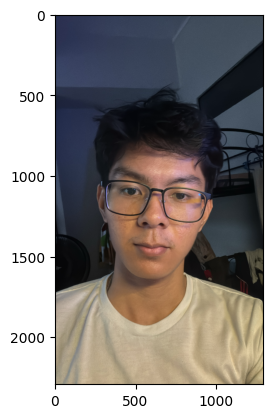

In [51]:
displayImage('/content/drive/My Drive/Images/Train/Leon/B1DCA277-365B-4C5D-8871-BF7E72BBF71C.png')

## 2. Load the images from your drive and apply preprocessing to your raw images

In [52]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            images.append(img.flatten())
            labels.append(person_name)
    return np.array(images), np.array(labels)

In [53]:
images, labels = load_images_from_folder('/content/drive/My Drive/Images/Train')

## 3. Display one pre-processed image from the training set

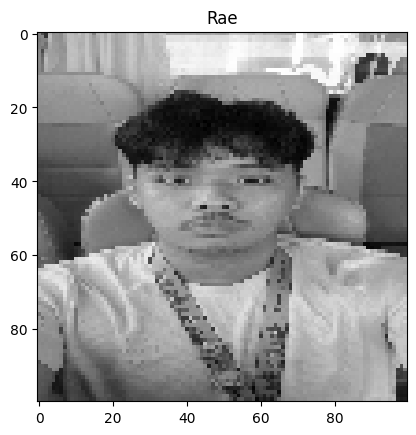

In [81]:
image = images[0].reshape(100,100)
name = labels[0]

plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')
plt.show()

## 4. Display ten pre-processed images from the training set

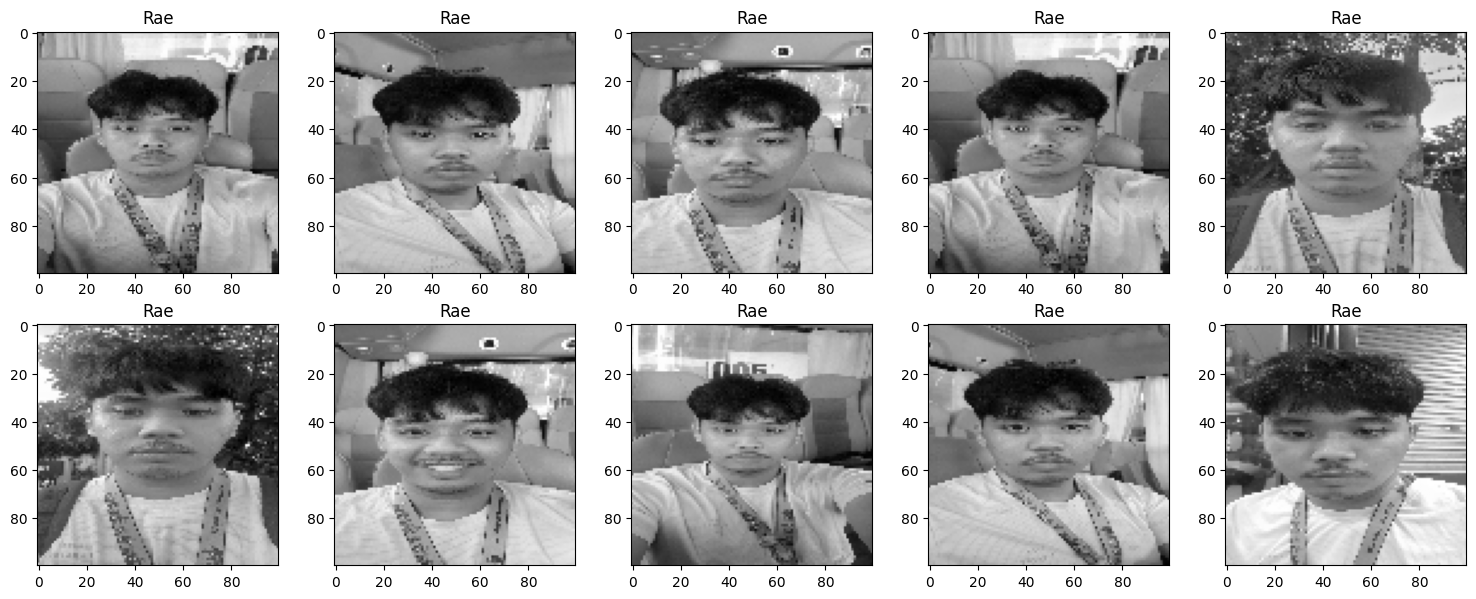

In [55]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(num_faces):
    image = images[i].reshape(100,100)
    name = labels[i]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('on')

plt.tight_layout()
plt.show()

## 5. Split your training data

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [57]:
from sklearn import svm

model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [58]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.89%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [59]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

#**Test**

Predicted label: ['Leon']


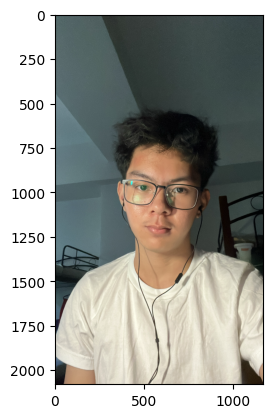

In [60]:
img_path = '/content/drive/My Drive/Images/Test/6B1F3045-56CD-4594-835F-7283D21F41AF.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


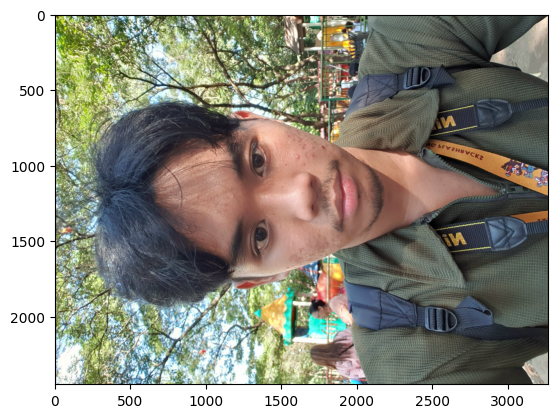

In [61]:
img_path = '/content/drive/My Drive/Images/Test/20231217_142814.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


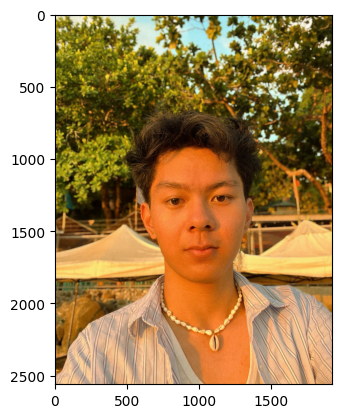

In [62]:
img_path = '/content/drive/My Drive/Images/Test/FC_20240415_0008.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


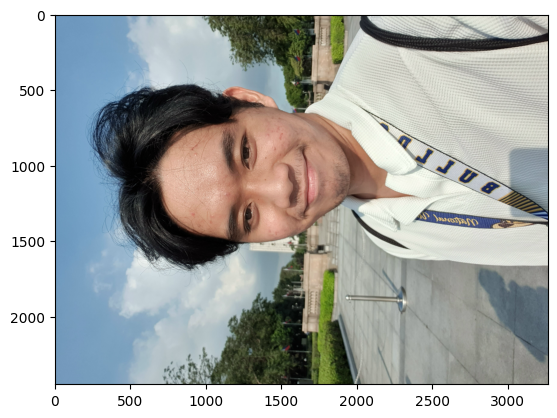

In [63]:
img_path = '/content/drive/My Drive/Images/Test/20240111_153000.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


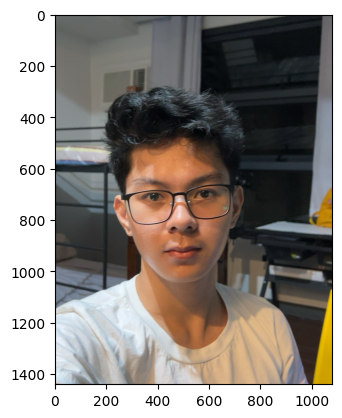

In [64]:
img_path = '/content/drive/My Drive/Images/Test/IMG_6159.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


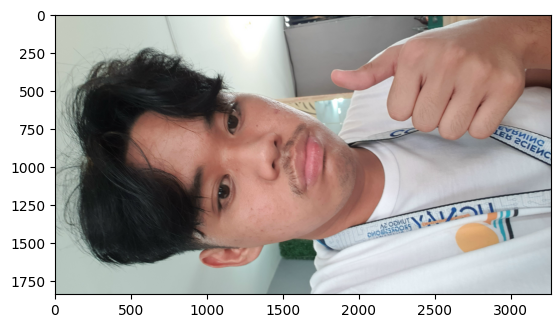

In [65]:
img_path = '/content/drive/My Drive/Images/Test/20240428_111236.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


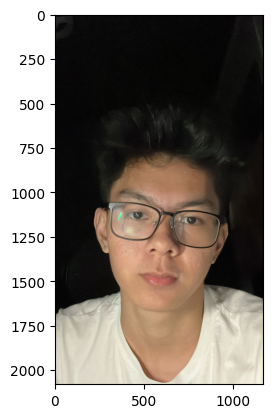

In [66]:
img_path = '/content/drive/My Drive/Images/Test/53DEFE06-CDCC-49F9-86AE-BB2BB1A3FF04.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


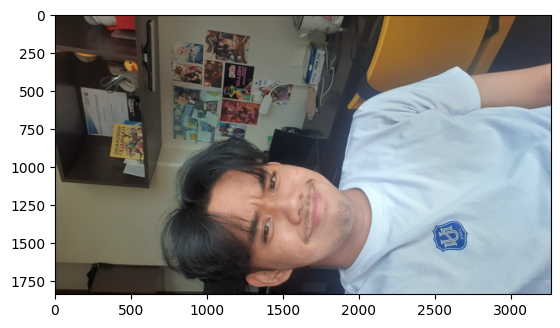

In [67]:
img_path = '/content/drive/My Drive/Images/Test/20240505_094726.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


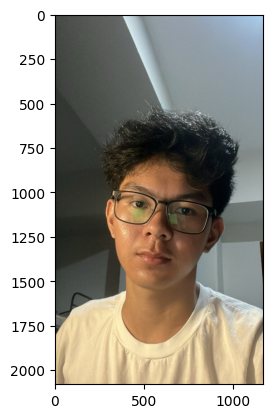

In [68]:
img_path = '/content/drive/My Drive/Images/Test/A52BFD07-C264-46ED-B9B8-65039850F122.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


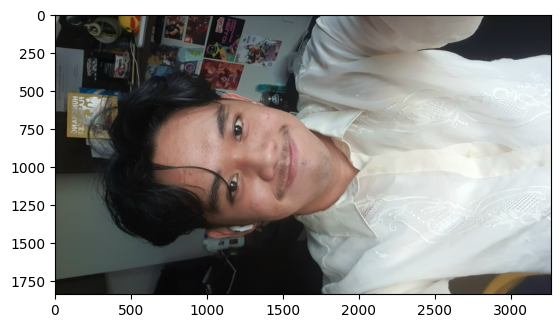

In [69]:
img_path = '/content/drive/My Drive/Images/Test/20240506_175931.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


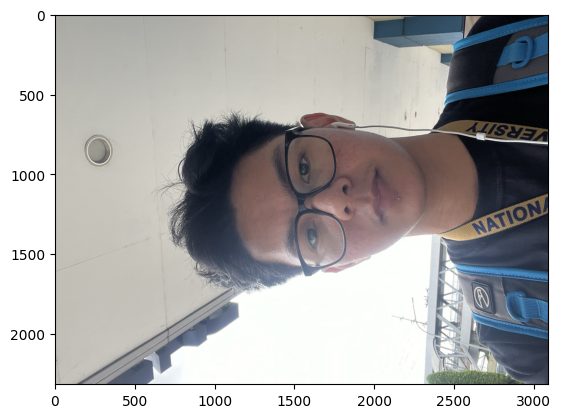

In [70]:
img_path = '/content/drive/My Drive/Images/Test/IMG_0825 2.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


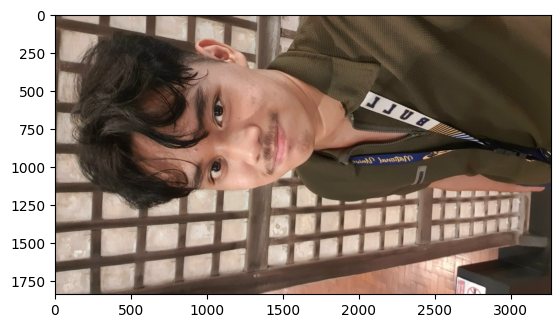

In [71]:
img_path = '/content/drive/My Drive/Images/Test/20240604_151632.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


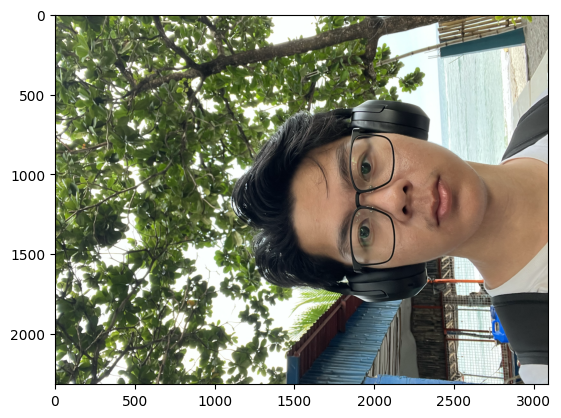

In [72]:
img_path = '/content/drive/My Drive/Images/Test/IMG_3405 2.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


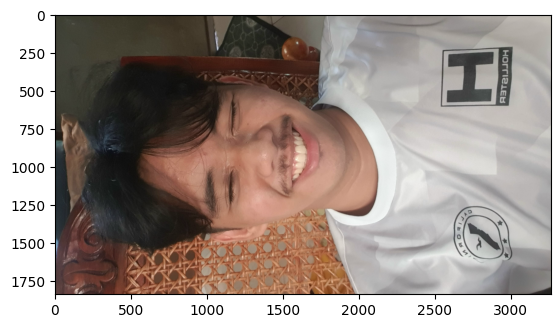

In [73]:
img_path = '/content/drive/My Drive/Images/Test/20240605_091048.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


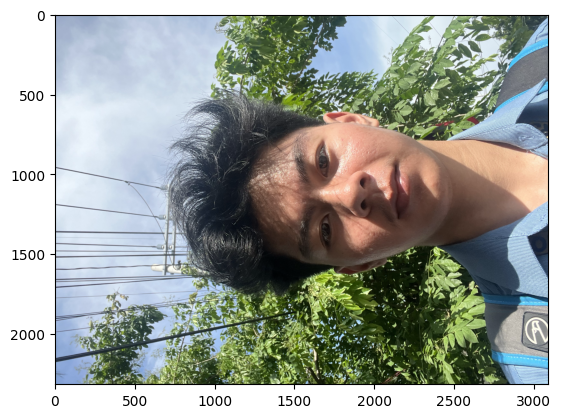

In [74]:
img_path = '/content/drive/My Drive/Images/Test/IMG_1808 2.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


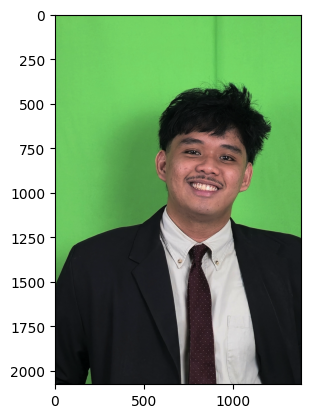

In [75]:
img_path = '/content/drive/My Drive/Images/Test/20250731_025438-01.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


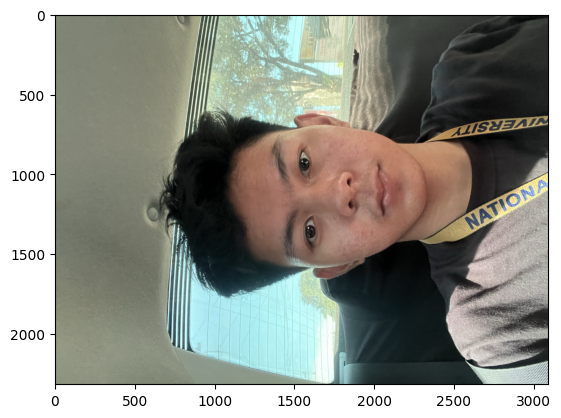

In [76]:
img_path = '/content/drive/My Drive/Images/Test/IMG_1826 2.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


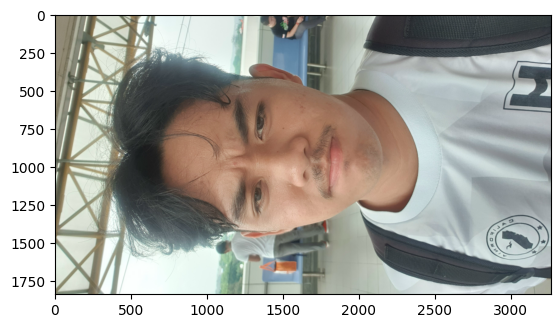

In [77]:
img_path = '/content/drive/My Drive/Images/Test/20240605_104436.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Leon']


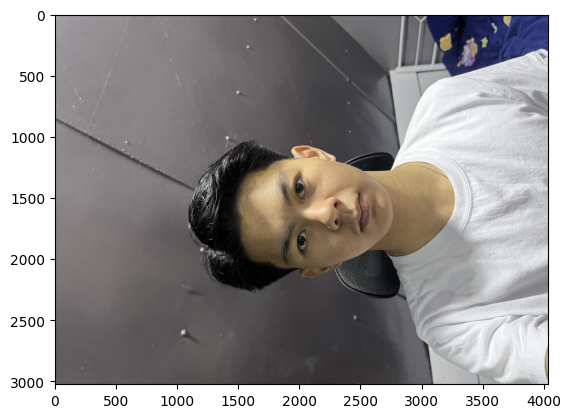

In [78]:
img_path = '/content/drive/My Drive/Images/Test/IMG_4356 2.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Rae']


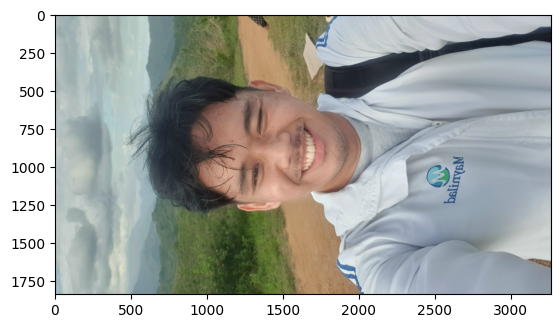

In [79]:
img_path = '/content/drive/My Drive/Images/Test/20250223_074636.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)